

This indicated an accuracy of 98.14 %



In [1]:
import tensorflow as tf
import keras
import os
import shutil
from tqdm import tqdm
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [2]:
img_path = 'C:\\Users\\tanvi\\Downloads\\indian-sign-language-translation-letters-n-digits'

for class1 in os.listdir(img_path):
    num_images = len(os.listdir(os.path.join(img_path,class1)))
    for (n,filename) in enumerate(os.listdir(os.path.join(img_path,class1))):
        img = os.path.join(img_path,class1,filename)
        if not os.path.exists('test/'+class1+'/'):
            os.makedirs('test/'+class1+'/')
            os.makedirs('train/'+class1+'/')
            os.makedirs('val/'+class1+'/')
        if n < int(0.1 * num_images):
            shutil.copy(img,'test/'+class1+'/'+filename)
        elif n < int(0.8 * num_images):
            shutil.copy(img,'train/'+class1+'/'+filename)
        else:
            shutil.copy(img,'val/'+class1+'/'+filename)

In [3]:
def load_data(image_dir):
    images = []
    y = []
    classNum = 0
    for class1 in tqdm(sorted(os.listdir(image_dir))):
        for file_name in os.listdir(os.path.join(image_dir,class1)):
            images.append(cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(image_dir,class1,file_name)),cv2.COLOR_BGR2RGB),(224,224)))
            y.append(classNum)
        classNum += 1
    print(f'Loaded {len(images)} images from {image_dir} directory')
    images = np.array(images)
    y = np.array(y)
    return images,y

In [4]:
test_images,test_labels = load_data('test/')

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:12<00:00,  2.56it/s]

Loaded 1074 images from test/ directory


In [5]:
model = load_model('TUSHALJAIN.h5')

In [11]:
preds = model.predict(test_images).argmax(axis=1)

34/34 [==============================] - 6s 162ms/step


In [12]:
test_labels.shape,preds.shape

((1074,), (1074,))

In [13]:
model.evaluate(test_images,OneHotEncoder().fit_transform(test_labels.reshape(-1, 1)))

TypeError: in user code:

    File "C:\Users\tanvi\Anaconda\lib\site-packages\keras\engine\training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\tanvi\Anaconda\lib\site-packages\keras\engine\training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\tanvi\Anaconda\lib\site-packages\keras\engine\training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\tanvi\Anaconda\lib\site-packages\keras\engine\training.py", line 1790, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\tanvi\Anaconda\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\tanvi\Anaconda\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\tanvi\Anaconda\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\tanvi\Anaconda\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\tanvi\Anaconda\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\tanvi\Anaconda\lib\site-packages\keras\backend.py", line 5557, in categorical_crossentropy
        target = tf.convert_to_tensor(target)

    TypeError: Failed to convert elements of SparseTensor(indices=Tensor("DeserializeSparse:0", shape=(None, 2), dtype=int64), values=Tensor("DeserializeSparse:1", shape=(None,), dtype=float32), dense_shape=Tensor("stack:0", shape=(2,), dtype=int64)) to Tensor. Consider casting elements to a supported type. See https://www.tensorflow.org/api_docs/python/tf/dtypes for supported TF dtypes.


<Axes: >

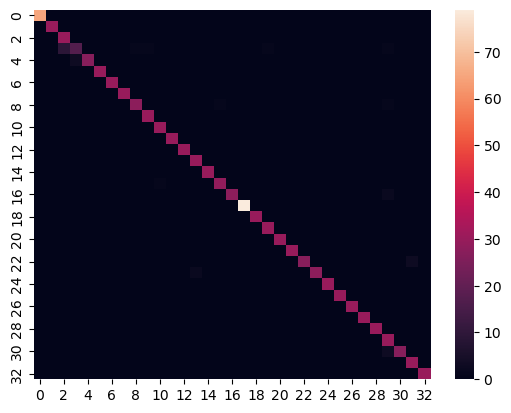

In [10]:
sns.heatmap(confusion_matrix(test_labels,preds))